<a href="https://www.kaggle.com/code/dipds109/ola-smote-bagging-boosting?scriptVersionId=160866078" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# OLA Driver Churn
<div style="float: left; padding-right: 20px;">
    <img src="https://imgnew.outlookindia.com/public/uploads/articles/2021/11/16/Ola_Appointment_Exit.jpg?imgsize=900" width="500">
</div>

<div style="text-align:justify;">
In this project, we addressed the issue of driver churn within OLA, a ride-hailing service. Our goal was to understand the factors contributing to driver churn and build predictive models to identify at-risk drivers early.
    .
    .
    

**Perform Exploratory Data Analysis (EDA):**

- Checked data types, handled missing values, and performed necessary data conversions.
- Conducted univariate analysis, including distribution plots for continuous variables and bar/count plots for categorical variables.
- Explored relationships between important variables through bivariate analysis.
- Gained insights into the dataset, identified attribute ranges, and addressed outliers.

**Data Preprocessing:**

- Applied KNN imputation to handle missing data.
- Performed feature engineering to create new informative features.
- Treated class imbalance issues to ensure balanced model training.
- Standardized numeric attributes for consistent scaling.
- Utilized encoding techniques for categorical variables.

**Model Building:**

- Employed ensemble learning techniques, including Bagging and Boosting algorithms, to build predictive models.
- Trained models to identify potential driver churn and assess their performance.

**Results Evaluation:**

- Generated ROC AUC curves to visualize model performance.
- Provided comments and insights based on ROC AUC results.
- Generated a classification report, including confusion matrices and other metrics, for comprehensive model evaluation.

**Actionable Insights & Recommendations:**

- Drew actionable insights from the analysis and modeling results.
- Provided recommendations to OLA to reduce driver churn and improve driver satisfaction.
- Highlighted key findings and implications for decision-making.
</div>


In [166]:
import numpy as np 
import pandas as pd 

## Importing the data

In [167]:
df=pd.read_csv('ola_driver_scaler.csv')

In [168]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 19104 entries, 0 to 19103

Data columns (total 14 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   Unnamed: 0            19104 non-null  int64  

 1   MMM-YY                19104 non-null  object 

 2   Driver_ID             19104 non-null  int64  

 3   Age                   19043 non-null  float64

 4   Gender                19052 non-null  float64

 5   City                  19104 non-null  object 

 6   Education_Level       19104 non-null  int64  

 7   Income                19104 non-null  int64  

 8   Dateofjoining         19104 non-null  object 

 9   LastWorkingDate       1616 non-null   object 

 10  Joining Designation   19104 non-null  int64  

 11  Grade                 19104 non-null  int64  

 12  Total Business Value  19104 non-null  int64  

 13  Quarterly Rating      19104 non-null  int64  

dtypes: float64(2), int64(8), object(4)

memory usage: 2

Most of the couloms are numerical columns except the city column, which contains the city codes where the driver is from.

In [170]:
df['Driver_ID'].nunique()

2381

Grouping by the driver column we can see that there are unique 2381 driver Ids.

In [171]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

we haev 61 missing age and 52 gender null values, We willaddress this but b4 that let us convert the date columns to the proper datatypes.

In [172]:
date_columns = ["MMM-YY", "Dateofjoining", "LastWorkingDate"]

for column in date_columns:
    df[column] = pd.to_datetime(df[column])

print(df.dtypes)

Unnamed: 0                       int64

MMM-YY                  datetime64[ns]

Driver_ID                        int64

Age                            float64

Gender                         float64

City                            object

Education_Level                  int64

Income                           int64

Dateofjoining           datetime64[ns]

LastWorkingDate         datetime64[ns]

Joining Designation              int64

Grade                            int64

Total Business Value             int64

Quarterly Rating                 int64

dtype: object


/var/folders/dc/4twzz8vj0d50v1pwqlqpjfg40000gn/T/ipykernel_1232/3630798888.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

  df[column] = pd.to_datetime(df[column])

/var/folders/dc/4twzz8vj0d50v1pwqlqpjfg40000gn/T/ipykernel_1232/3630798888.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

  df[column] = pd.to_datetime(df[column])

/var/folders/dc/4twzz8vj0d50v1pwqlqpjfg40000gn/T/ipykernel_1232/3630798888.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

  df[column] = pd.to_datetime(df[column])


#### KNN Imputation to fill up the numerical couloms

In [173]:
from sklearn.impute import KNNImputer

numerical_columns = ['Driver_ID', 'Age', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']
numerical_data = df[numerical_columns]

imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
imputed_numerical_data = imputer.fit_transform(numerical_data)
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_columns)

df[numerical_columns] = imputed_numerical_df

# Verify that missing values have been imputed
missing_values = df.isnull().sum()
print("Missing values after imputation:")
print(missing_values)


Missing values after imputation:

Unnamed: 0                  0

MMM-YY                      0

Driver_ID                   0

Age                         0

Gender                     52

City                        0

Education_Level             0

Income                      0

Dateofjoining               0

LastWorkingDate         17488

Joining Designation         0

Grade                       0

Total Business Value        0

Quarterly Rating            0

dtype: int64


## Feature Engineering

 Creating a column named Quarterly_Rating_Change which targets the drivers whose performance have imroved over time.

In [174]:
df['Quarterly_Rating_Change'] = df.groupby('Driver_ID')['Quarterly Rating'].diff()
df['Rating_Increased'] = (df['Quarterly_Rating_Change'] > 0).astype(int)


Creating a column named target. The drivers where the last working date is not mentioned are believed to have not left the origanization and are alloted a target value of 0. Drivers who left the org are alloted a target variable 1. 

In [175]:
df['target']=0
df.loc[df['LastWorkingDate'].notnull(), 'target'] = 1

Creating a column named Income_Diff, for the drivers who income has increased overtime.

In [176]:
import pandas as pd

# Sort the dataset by 'Driver_ID' and 'MMM-YY' to ensure the data is in the correct order
df.sort_values(by=['Driver_ID', 'MMM-YY'], inplace=True)

# Create a new column 'Income_Increased' with default value 0
df['Income_Increased'] = 0

# Calculate the difference in income for each driver
df['Income_Diff'] = df.groupby('Driver_ID')['Income'].diff()

# Set 'Income_Increased' value to 1 for drivers whose income has increased
df.loc[df['Income_Diff'] > 0, 'Income_Increased'] = 1

# Drop the 'Income_Diff' column if you no longer need it
df.drop(columns=['Income_Diff'], inplace=True)


Finally creating a column to check the total number of days the driver is associated with the organization since their time of joining. The dataset is for the years 2019-20 so i have taken the last day as 12/12/2020. I have calculated the total working days with reference to this day.

In [177]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

# Use '12/12/2020' as the default date for LastWorkingDate where it's None
default_date = pd.to_datetime('12/12/2020')
df['LastWorkingDate'].fillna(default_date, inplace=True)

# Calculate the difference and store it in 'total_num_of_days' column
df['total_num_of_days'] = (df['LastWorkingDate'] - df['Dateofjoining']).dt.days


Checking whether all the couloms are visible properly or not.

In [178]:
df.head(8)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Change,Rating_Increased,target,Income_Increased,total_num_of_days
0,0,2019-01-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2020-12-12,1.0,1.0,2381060.0,2.0,NaN,0,0,0,719
1,1,2019-02-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2020-12-12,1.0,1.0,-665480.0,2.0,0.0,0,0,0,719
2,2,2019-03-01,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,0.0,2.0,0.0,0,1,0,77
3,3,2020-11-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,2020-12-12,2.0,2.0,0.0,1.0,NaN,0,0,0,36
4,4,2020-12-01,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,2020-12-12,2.0,2.0,0.0,1.0,0.0,0,0,0,36
5,5,2019-12-01,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-12-12,2.0,2.0,0.0,1.0,NaN,0,0,0,371
6,6,2020-01-01,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-12-12,2.0,2.0,0.0,1.0,0.0,0,0,0,371
7,7,2020-02-01,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-12-12,2.0,2.0,0.0,1.0,0.0,0,0,0,371


Creating an aggregated data by grouping the data with driver ids. This was done as there was multiple entries for each driver.

In [179]:
aggregated_data = df.groupby('Driver_ID').agg({
    'Age': 'last',
    'Gender': 'max',
    'City': 'last',
    'Education_Level': 'last',
    'Income': 'last',
    'Dateofjoining': 'first',
    'LastWorkingDate': 'last',
    'Joining Designation': 'first',
    'Grade': 'last',
    'Total Business Value': 'sum',
    'Quarterly Rating': 'last',
    'target':'last',
    'Rating_Increased':'max',
    'Income_Increased':'max',
    'total_num_of_days':'max'
    
}).reset_index()

# Displaying the first few rows of the aggregated data
aggregated_data.head(10)

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,target,Rating_Increased,Income_Increased,total_num_of_days
0,1.0,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-03-11,1.0,1.0,1715580.0,2.0,1,0,0,719
1,2.0,31.0,0.0,C7,2.0,67016.0,2020-11-06,2020-12-12,2.0,2.0,0.0,1.0,0,0,0,36
2,4.0,43.0,0.0,C13,2.0,65603.0,2019-12-07,2020-04-27,2.0,2.0,350000.0,1.0,1,0,0,371
3,5.0,29.0,0.0,C9,0.0,46368.0,2019-01-09,2019-03-07,1.0,1.0,120360.0,1.0,1,0,0,703
4,6.0,31.0,1.0,C11,1.0,78728.0,2020-07-31,2020-12-12,3.0,3.0,1265000.0,2.0,0,1,0,134
5,8.0,34.0,0.0,C2,0.0,70656.0,2020-09-19,2020-11-15,3.0,3.0,0.0,1.0,1,0,0,84
6,11.0,28.0,1.0,C19,2.0,42172.0,2020-12-07,2020-12-12,1.0,1.0,0.0,1.0,0,0,0,5
7,12.0,35.0,0.0,C23,2.0,28116.0,2019-06-29,2019-12-21,1.0,1.0,2607180.0,1.0,1,0,0,532
8,13.0,31.0,0.0,C19,2.0,119227.0,2015-05-28,2020-11-25,1.0,4.0,10213040.0,1.0,1,1,0,2025
9,14.0,39.0,1.0,C26,0.0,19734.0,2020-10-16,2020-12-12,3.0,3.0,0.0,1.0,0,0,0,57


## Univariate Analysis

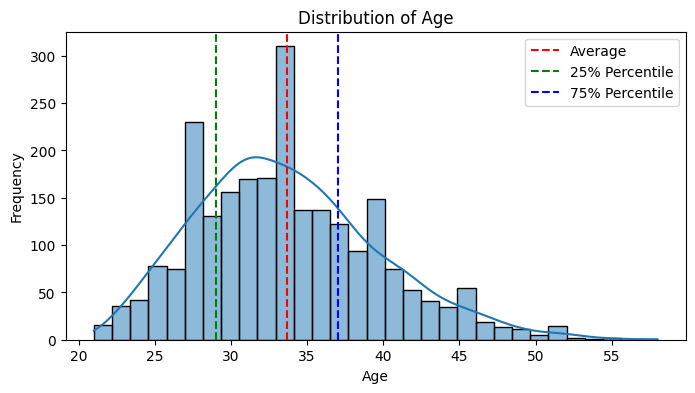

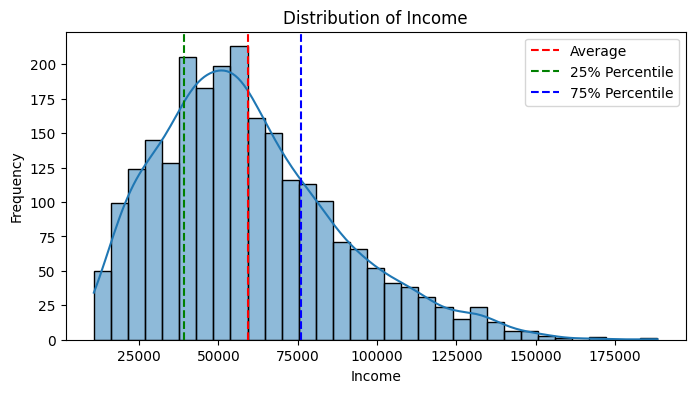

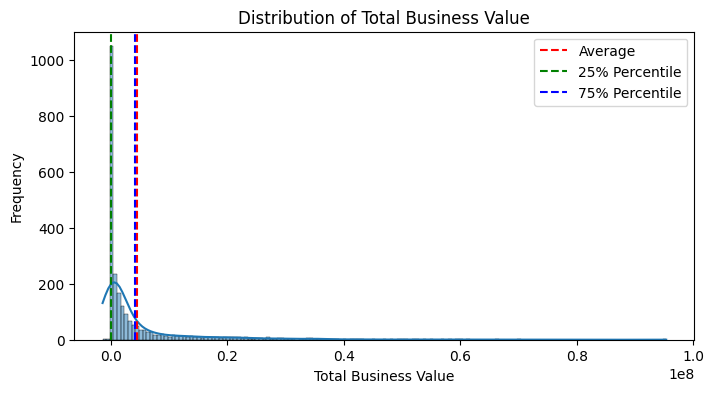

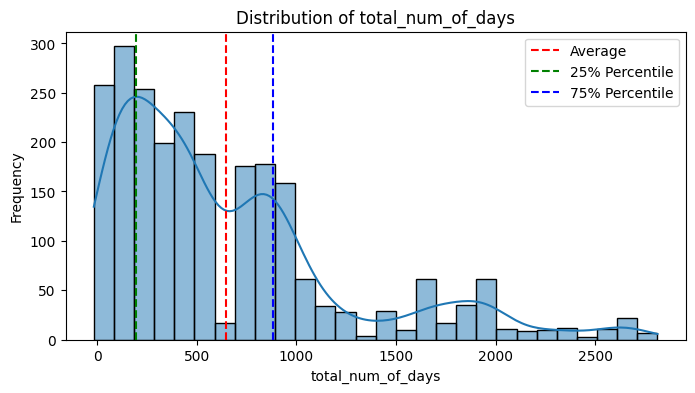

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset

# List of continuous variables
continuous_vars = ['Age', 'Income', 'Total Business Value','total_num_of_days']

# Create distribution plots for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    
    # Plot the distribution
    sns.histplot(aggregated_data[var], kde=True)
    
    # Calculate and add average line
    average = aggregated_data[var].mean()
    plt.axvline(average, color='red', linestyle='--', label='Average')
    
    # Calculate and add 25% and 75% lines
    percentile_25 = aggregated_data[var].quantile(0.25)
    percentile_75 = aggregated_data[var].quantile(0.75)
    plt.axvline(percentile_25, color='green', linestyle='--', label='25% Percentile')
    plt.axvline(percentile_75, color='blue', linestyle='--', label='75% Percentile')
    
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


From the graphs we can see that 
- the average age is a little less than 35. Most of the people are in the age bracket 29~37.
- The average income for the drivers is a little over 50000. Most of them are earning between 37K to 75K.
- The average time a driver is associated with the company is 500 days. Most people stay betweeen 200 to 1000 days.

Suggestions:
- The company can have a day wise incentive for the drivers. The more time they are associated with the company the more rewards/ money they get. This can reduce the churn for the drivers.

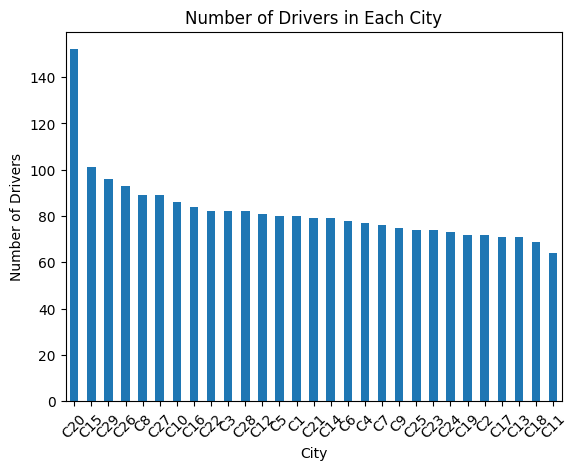

In [181]:
city_driver_count= aggregated_data['City'].value_counts()
plt.figure()
city_driver_count.plot(kind='bar')
plt.title('Number of Drivers in Each City')
plt.xlabel('City')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.show()

The company can try to reachout to more peolpe in the cities with less drivers, and provide them with more incentives so increase driver induction in the company. It will help keep a balance when the churn is high.

## Bivariate Analysis 

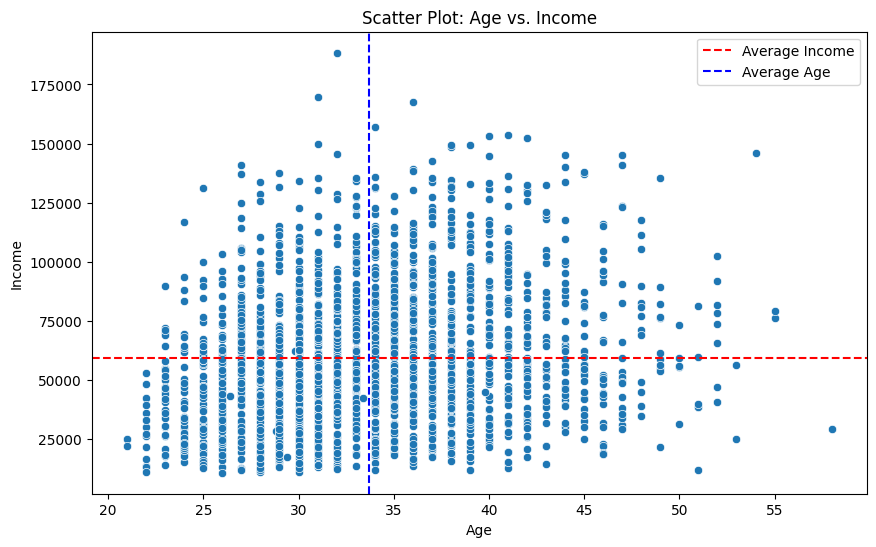

In [182]:

# Scatter plot for Age vs. Income
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=aggregated_data, x='Age', y='Income')

# Calculate and add average lines
average_age = aggregated_data['Age'].mean()
average_income = aggregated_data['Income'].mean()

plt.axhline(average_income, color='red', linestyle='--', label='Average Income')
plt.axvline(average_age, color='blue', linestyle='--', label='Average Age')


plt.title('Scatter Plot: Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


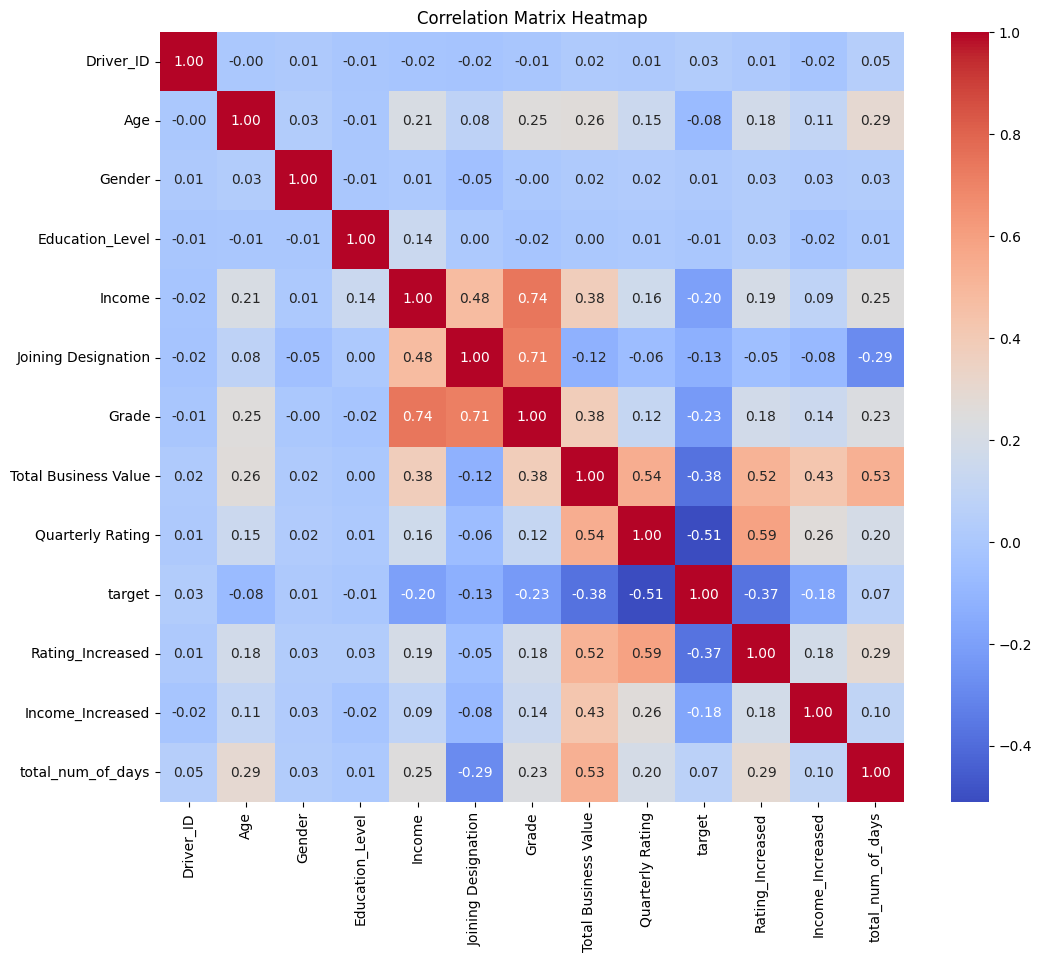

In [183]:
numeric_columns = aggregated_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Notable Correlations:

- Income and Grade: There is a strong positive correlation of 0.74 between Income and Grade, suggesting that as one's grade increases, their income tends to increase as well.
- Joining Designation and Grade: This pair also has a strong positive correlation (0.71), indicating a likely trend that individuals with a higher initial designation tend to reach higher grades.
- Total Business Value and several factors: Total Business Value has moderately strong positive correlations with Income (0.38), Joining Designation (0.38), and Grade (0.38). This suggests that higher income, higher joining designation, and higher grade are associated with higher business values generated.
- Target and several factors: The variable 'target' has a moderately strong negative correlation with Total Business Value (-0.38) and Quarterly Rating (-0.51), indicating that as the business value and quarterly ratings increase, the likelihood of hitting the target decreases (or vice versa). This could suggest that the targets might be set higher for individuals with higher business values or ratings.

Weak or No Correlation: Several variables such as Driver_ID, Age, Gender, and Education Level show very little to no correlation with other variables, indicated by the colors close to white. This means that these factors do not have a strong linear relationship with the others in the dataset.


target

1    1616

0     765

Name: count, dtype: int64



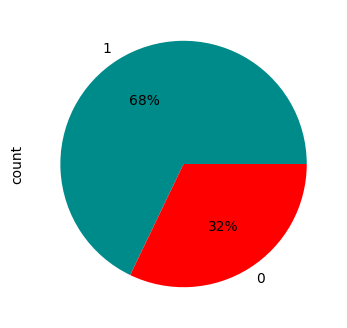

In [184]:
(aggregated_data['target']).value_counts().plot(kind='pie', figsize=(4, 4), colors=['darkcyan','red'], autopct='%1.0f%%')

print('=' * 30)
print((aggregated_data['target']).value_counts())
print('=' * 30)

The pie plot shows there is significant imbalance in the dataset. We will create the base models and then i will try to handle the imbalance and check whether the model performance improves after addressing it.

## Preparing the DataSet for ML-Model

Scaling the data

In [185]:
from sklearn.preprocessing import StandardScaler


# List of columns to standardize- Mostly numerical couloms
columns_to_standardize = ['Driver_ID', 'Age', 'Education_Level', 'Income', 'Joining Designation', 'Grade',
                           'Total Business Value', 'Quarterly Rating', 'Rating_Increased',
                           'Income_Increased', 'total_num_of_days']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform them
aggregated_data[columns_to_standardize] = scaler.fit_transform(aggregated_data[columns_to_standardize])

# Now, the specified columns in 'aggregated_data' are standardized


One hot encoding of the city column

In [186]:
aggregated_data= pd.get_dummies(aggregated_data, columns=['City'])


# Print the resulting DataFrame
print(aggregated_data)

      Driver_ID       Age  Gender  Education_Level    Income Dateofjoining  \

0     -1.732720 -0.950311     0.0         1.216049 -0.068616    2018-12-24   

1     -1.731479 -0.448034     0.0         1.216049  0.270700    2020-11-06   

2     -1.728998  1.561073     0.0         1.216049  0.220907    2019-12-07   

3     -1.727757 -0.782885     0.0        -1.234575 -0.456914    2019-01-09   

4     -1.726516 -0.448034     1.0        -0.009263  0.683418    2020-07-31   

...         ...       ...     ...              ...       ...           ...   

2376   1.720167  0.054243     0.0        -1.234575  0.827440    2015-10-15   

2377   1.721407  0.054243     1.0        -1.234575 -1.664305    2020-08-28   

2378   1.722648  1.895924     0.0        -1.234575 -0.844471    2018-07-31   

2379   1.723889 -0.950311     1.0         1.216049  0.358163    2018-07-21   

2380   1.725129 -0.615460     0.0         1.216049  0.384804    2020-06-08   



     LastWorkingDate  Joining Designation     Grad

#### Checking the data before splitting

In [187]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2381 entries, 0 to 2380

Data columns (total 44 columns):

 #   Column                Non-Null Count  Dtype         

---  ------                --------------  -----         

 0   Driver_ID             2381 non-null   float64       

 1   Age                   2381 non-null   float64       

 2   Gender                2381 non-null   float64       

 3   Education_Level       2381 non-null   float64       

 4   Income                2381 non-null   float64       

 5   Dateofjoining         2381 non-null   datetime64[ns]

 6   LastWorkingDate       2381 non-null   datetime64[ns]

 7   Joining Designation   2381 non-null   float64       

 8   Grade                 2381 non-null   float64       

 9   Total Business Value  2381 non-null   float64       

 10  Quarterly Rating      2381 non-null   float64       

 11  target                2381 non-null   int64         

 12  Rating_Increased      2381 non-null   float64       

 13  

In [188]:
aggregated_data.head(10)

,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,-1.732720,-0.950311,0.0,1.216049,-0.068616,2018-12-24,2019-03-11,-0.975022,-1.164953,-0.314641,...,False,False,False,False,False,False,False,False,False,False
1,-1.731479,-0.448034,0.0,1.216049,0.270700,2020-11-06,2020-12-12,0.213676,-0.102619,-0.502646,...,False,False,False,False,False,False,False,True,False,False
2,-1.728998,1.561073,0.0,1.216049,0.220907,2019-12-07,2020-04-27,0.213676,-0.102619,-0.464290,...,False,False,False,False,False,False,False,False,False,False
3,-1.727757,-0.782885,0.0,-1.234575,-0.456914,2019-01-09,2019-03-07,-0.975022,-1.164953,-0.489456,...,False,False,False,False,False,False,False,False,False,True
4,-1.726516,-0.448034,1.0,-0.009263,0.683418,2020-07-31,2020-12-12,1.402374,0.959714,-0.364019,...,False,False,False,False,False,False,False,False,False,False
5,-1.724035,0.054243,0.0,-1.234575,0.398970,2020-09-19,2020-11-15,1.402374,0.959714,-0.502646,...,False,False,False,False,False,False,False,False,False,False
6,-1.720313,-0.950311,1.0,1.216049,-0.604776,2020-12-07,2020-12-12,-0.975022,-1.164953,-0.502646,...,False,False,False,False,False,False,False,False,False,False
7,-1.719072,0.221668,0.0,1.216049,-1.100094,2019-06-29,2019-12-21,-0.975022,-1.164953,-0.216934,...,False,False,False,False,False,False,False,False,False,False
8,-1.717832,-0.448034,0.0,1.216049,2.110560,2015-05-28,2020-11-25,-0.975022,2.022048,0.616567,...,False,False,False,False,False,False,False,False,False,False
9,-1.716591,0.891371,1.0,-1.234575,-1.395467,2020-10-16,2020-12-12,1.402374,0.959714,-0.502646,...,False,False,False,False,False,False,False,False,False,False


Splitting the data

In [191]:
# Split your data into training and testing sets
X = aggregated_data.drop(columns=['target', 'Dateofjoining', 'LastWorkingDate'])
y = aggregated_data['target']

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support



           0       0.84      0.75      0.79       150

           1       0.89      0.93      0.91       327



    accuracy                           0.88       477

   macro avg       0.86      0.84      0.85       477

weighted avg       0.87      0.88      0.87       477




In [193]:
import xgboost as xgb

# Create an XGBoost Classifier with scale_pos_weight
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum())

# Fit the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support



           0       0.82      0.81      0.81       150

           1       0.91      0.92      0.91       327



    accuracy                           0.88       477

   macro avg       0.86      0.86      0.86       477

weighted avg       0.88      0.88      0.88       477




The overall accuracy in both the models is pretty good at 88%. Lets see if we can improve the performance by impleminting SMOTE.

### Imbalance treatment

In [194]:
from imblearn.over_sampling import SMOTE
X = aggregated_data.drop(columns=['target', 'Dateofjoining', 'LastWorkingDate'])
y = aggregated_data['target']

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:\n", resampled_data['target'].value_counts())

Class distribution after SMOTE:

 target

1    1616

0    1616

Name: count, dtype: int64


Creating the train test split from the SMOTE dataset

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.90      0.93      0.91       326

           1       0.93      0.89      0.91       321



    accuracy                           0.91       647

   macro avg       0.91      0.91      0.91       647

weighted avg       0.91      0.91      0.91       647




In [196]:
xgb_classifier= xgb.XGBClassifier(
    random_state=42  # Set the random seed for reproducibility
)

xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.89      0.92      0.91       326

           1       0.92      0.89      0.90       321



    accuracy                           0.90       647

   macro avg       0.90      0.90      0.90       647

weighted avg       0.90      0.90      0.90       647




Random forests performed better when applied the imbalance tratment. Now lets perform hyper parameter testting on it and see if i can improve the accuracy.

In [ ]:
from sklearn.model_selection import StratifiedKFold
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize StratifiedKFold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
classification_reports = []

# Perform Stratified K-Fold cross-validation
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model and store the classification report
    classification_reports.append(classification_report(y_test, y_pred))

# Print the classification reports for each fold
for i, report in enumerate(classification_reports, 1):
    print(f"Fold {i} Classification Report:")
    print(report)

Fold 1 Classification Report:

              precision    recall  f1-score   support



           0       0.89      0.92      0.91       162

           1       0.92      0.89      0.90       162



    accuracy                           0.90       324

   macro avg       0.90      0.90      0.90       324

weighted avg       0.90      0.90      0.90       324



Fold 2 Classification Report:

              precision    recall  f1-score   support



           0       0.90      0.93      0.92       162

           1       0.93      0.90      0.92       162



    accuracy                           0.92       324

   macro avg       0.92      0.92      0.92       324

weighted avg       0.92      0.92      0.92       324



Fold 3 Classification Report:

              precision    recall  f1-score   support



           0       0.85      0.94      0.89       161

           1       0.93      0.83      0.88       162



    accuracy                           0.89       323

   macro av

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

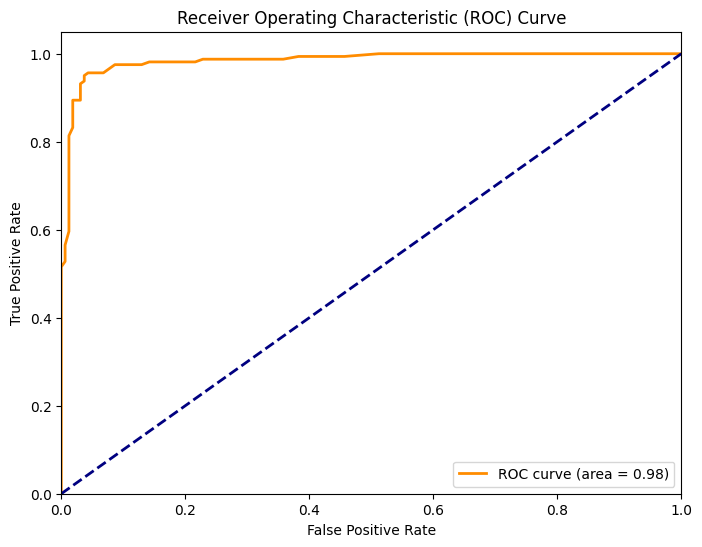

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
classification_report_str = classification_report(y_test, y_pred)
confusion_matrix_arr = confusion_matrix(y_test, y_pred)

# Print the Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report_str)

print("\nConfusion Matrix:")
print(confusion_matrix_arr)

Classification Report:

              precision    recall  f1-score   support



           0       0.95      0.96      0.95       162

           1       0.96      0.94      0.95       161



    accuracy                           0.95       323

   macro avg       0.95      0.95      0.95       323

weighted avg       0.95      0.95      0.95       323





Confusion Matrix:

[[156   6]

 [  9 152]]
